In [148]:
import tensorflow as tf
import tensorflow_probability as tfp
import cv2 as cv
import matplotlib.pyplot as plt
import os

IMG_SIZE = 480
"""
>> A Beta distribution is used to generate a random blending ratio between two images.
>> Beta(0.2, 0.2): has a high probability density near 0 and 1, which means 
it will likely yield blending ratios close to these extremes, emphasizing one
image heavily in the blend.
>> Beta(0.5, 0.5): the distribution would be symmetric, favoring more balanced 
mixtures of the two images, around a 50-50 ratio.
"""
_lambda = tfp.distributions.Beta(0.2, 0.2)
_lambda = _lambda.sample(1)
print(_lambda)
_lambda = _lambda[0]
# uncomment this to always get a ~50% image mixup
# _lambda = tf.constant([0.5056139], dtype=tf.float32)

tf.Tensor([0.5056139], shape=(1,), dtype=float32)


In [149]:
img_1 = cv.imread(os.path.join(".", "assets", "cat1.jpg"))[:,:,::-1]
img_1 = cv.resize(img_1, (IMG_SIZE, IMG_SIZE), interpolation=cv.INTER_CUBIC)
label_1 = 0
img_2 = cv.imread(os.path.join(".", "assets", "cat2.jpg"))[:,:,::-1]
img_2 = cv.resize(img_2, (IMG_SIZE, IMG_SIZE), interpolation=cv.INTER_CUBIC)
label_2 = 1

"""
Mixup forces the model to learn broader, more flexible features that still work across 
a range of variations, potentially improving performance on real-world, unseen data.
"""
mixup_img = _lambda * img_1 + (1 - _lambda) * img_2
mixup_label = _lambda * label_1 + (1 - _lambda) * label_2

mixup_img /= 255 # normalizig so matplotlib doesn't complain

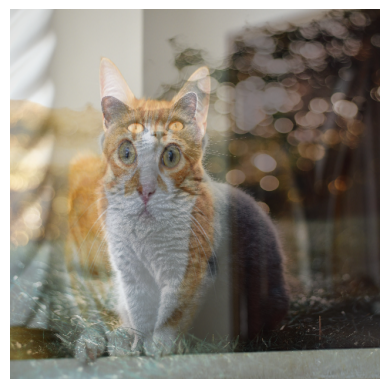

In [150]:
plt.figure()
plt.axis("off")
plt.imshow(mixup_img)
plt.show()